In [ ]:
from sklearn import preprocessing
import pandas as pd
import numpy as np 



In [ ]:
data = pd.read_csv('/content/drive/MyDrive/2020/DATA Annalytics/Project Velo Lib/out.csv')
data.head()

,status,name,bike_stands,last_update,available_bike_stands,available_bikes,lat,lng,bad_stands,time
0,CLOSED,001_JARDINES DE PEREDA,40,2017-07-20 06:22:38,10,30,43.461719,-3.8021,0,6.366667
1,CLOSED,001_JARDINES DE PEREDA,40,2017-07-20 06:27:01,10,30,43.461719,-3.8021,0,6.450000
2,CLOSED,001_JARDINES DE PEREDA,40,2017-07-20 06:29:23,10,30,43.461719,-3.8021,0,6.483333
3,CLOSED,001_JARDINES DE PEREDA,40,2017-07-20 06:29:39,10,30,43.461719,-3.8021,0,6.483333
4,CLOSED,001_JARDINES DE PEREDA,40,2017-07-20 06:33:01,10,30,43.461719,-3.8021,0,6.550000


In [ ]:
data.size

5822120

In [ ]:
data = data.groupby(by=["name"])
data.size

<bound method GroupBy.size of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7fddf745d9d0>>

In [ ]:

p1 = data.get_group('001_JARDINES DE PEREDA')
p2 = data.get_group('002_PLAZA DE LAS BRISAS')
p3 = data.get_group('003_PARQUE LAS LLAMAS')
p4 = data.get_group('004_CORMORÁN')
p5 = data.get_group('005_GLORIETA DE LOS DELFINES')
p6 = data.get_group('006_FACULDAD DE CIENCIAS')
p7 = data.get_group('007_FACULTAD DE DERECHO')
p8 = data.get_group('008_PLAZA DE ITALIA')
p9 = data.get_group('009_AVENIDA DE LA MAGDALENA')
p10 = data.get_group('010_PLAZA DE SAN MARTIN')
p11 = data.get_group('011_PUERTO CHICO')
p12 = data.get_group('012_CALLE ALTA')
p13 = data.get_group('013_CALLE DE SAN FERNANDO')
p14 = data.get_group('014_ATILANO RODRIGUEZ')
p15 = data.get_group('015_AV.DE LOS CASTROS 141')
p16 = data.get_group('016_SEVERO OCHOA')
p17 = data.get_group('017_RUCANDIAL')


In [ ]:
p17.size

363510

In [ ]:
x = p1.iloc[:,4:5]
x

,available_bike_stands
0,10
1,10
2,10
3,10
4,10
...,...
39063,13
39064,13
39065,13
39066,13


In [ ]:
x = x.values

In [ ]:
x

array([[10],
       [10],
       [10],
       ...,
       [13],
       [13],
       [13]])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x) 
x.shape

(39063, 1)

In [ ]:
y = x[60:]
y.shape

(39003, 1)

In [ ]:
y

array([[ 1.27504996],
       [ 1.41325916],
       [ 1.41325916],
       ...,
       [-0.65987876],
       [-0.65987876],
       [-0.65987876]])

In [ ]:
p11 = []
for i in range(60,39063,1):
  p11.append(x[i-60:i, :])
p11 = np.array(p11)

In [ ]:
p11.shape

(39003, 60, 1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test,y_train, y_test = train_test_split(p11,y,test_size=0.2)
x_train.shape

(31202, 60, 1)

In [ ]:
y_train.shape

(31202, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
from tensorflow import keras

In [ ]:
Classifier = Sequential()
 

In [ ]:
 
Classifier.add(LSTM(units = 50, return_sequences=True, input_shape = (x_train.shape[1],1)))
Classifier.add(Dropout(0.2))


In [ ]:
Classifier.add(LSTM(units = 50, return_sequences=True))
Classifier.add(Dropout(0.2))

In [ ]:
Classifier.add(LSTM(units = 50, return_sequences=True))
Classifier.add(Dropout(0.2))

In [ ]:
Classifier.add(LSTM(units = 50, return_sequences=True))
Classifier.add(Dropout(0.2))

In [ ]:
Classifier.add(Dense(1, activation='relu'))

In [ ]:
Classifier.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
Classifier.fit(x_train,y_train,epochs=10,batch_size=1,verbose=2)

Epoch 1/10
31202/31202 - 268s - loss: 0.6707
Epoch 2/10
31202/31202 - 256s - loss: 0.6594
Epoch 3/10
31202/31202 - 254s - loss: 0.6547
Epoch 4/10
31202/31202 - 255s - loss: 0.6496
Epoch 5/10
31202/31202 - 255s - loss: 0.6452
Epoch 6/10
31202/31202 - 254s - loss: 0.6410
Epoch 7/10
31202/31202 - 254s - loss: 0.6372
Epoch 8/10
31202/31202 - 255s - loss: 0.6343
Epoch 9/10
31202/31202 - 254s - loss: 0.6312
Epoch 10/10
31202/31202 - 254s - loss: 0.6289


In [ ]:
scores = Classifier.evaluate(x_train,y_train,verbose=0)
print("%s: %.2f%%" % (Classifier.metrics_names, scores*100))

['loss']: 62.41%


In [ ]:
print(Classifier.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60, 50)            2

In [ ]:
Classifier.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])


In [ ]:
Classifier.save_weights('/content/drive/MyDrive/2020/DATA Annalytics/Project Velo Lib/classifier_weights_10_1.h5')
Classifier.save('/content/drive/MyDrive/2020/DATA Annalytics/Project Velo Lib/model_10_1.h5')

In [ ]:
Classifier = keras.models.load_model('/content/drive/MyDrive/2020/DATA Annalytics/Project Velo Lib/model_10_1.h5')

In [ ]:
# make predictions
yhat = Classifier.predict(x_test, verbose=0)
yhat = yhat[:,-1,:]
print(yhat)

[[0.41427392]
 [0.        ]
 [0.9400347 ]
 ...
 [0.9974896 ]
 [0.3791558 ]
 [1.0783732 ]]


In [ ]:
yhat = scaler.inverse_transform(yhat)
y_test = scaler.inverse_transform(y_test)

In [ ]:
y = y_test[:100]
x = yhat[:100]
x.shape

(100, 1)

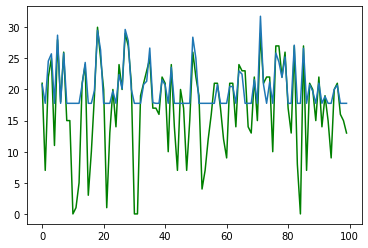

In [ ]:
import matplotlib.pyplot as plot
import matplotlib.pyplot as plt 
plt.plot(y,color='green')
plt.plot(x)
plot.show()